In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('couples.csv', sep = ',',na_values = '.', decimal = '.', encoding =  'utf-8')


A FAIRE: 
- variable c'est l'homme qui a le soucis, c'est la femme qui a le soucis, les deux ont un soucis
- Durée entre la première consultation et la date de conception pour ceux ayant eu un enfant
- Durée entre la première consultation et la date des dernières nouvelles (01/06/2009)
- Encadrement de l'âge
- Encadrement de l'indice de masse corporelle
- Encadrement de la durée d'infertilité avant consultation

In [3]:
data.head()

,id,enfant,dconsultation,dconception,ddn,age_h,diplome_h,bmi_h,patho_h,cryptorchidie,spermo,age_f,diplome_f,bh_f,ct_f,patho_f,fecondite,duree_infertilite,traitement
0,2707,1,18/04/2000,22/01/2001,NaN,33,Bac+,27.166448,non,Non,normal,34.0,Bac+,normal,ovulation,non,primaire,38.0,IAC
1,2955,1,11/03/2003,14/03/2007,NaN,42,Bac-,22.204082,non,Non,anormal,30.0,Bac,normal,ovulation,NaN,primaire,16.0,ICSI
2,3801,1,24/08/2004,05/10/2005,NaN,45,Bac+,26.794938,non,Non,anormal,29.0,Bac+,NaN,NaN,NaN,secondaire,10.0,IAC
3,5816,0,17/04/2001,NaN,01/06/2009,36,Bac+,18.612245,non,Non,anormal,38.0,Bac+,normal,ovulation,pb tubaire unilateral,secondaire,60.0,FIV
4,12933,0,18/08/2004,NaN,01/06/2009,32,Bac,24.158818,non,Non,azoo,30.0,Bac+,NaN,NaN,NaN,secondaire,6.0,Medical


On va séparer les données numériques des données catégorielles


In [4]:
data.dtypes


id                     int64
enfant                 int64
dconsultation         object
dconception           object
ddn                   object
age_h                  int64
diplome_h             object
bmi_h                float64
patho_h               object
cryptorchidie         object
spermo                object
age_f                float64
diplome_f             object
bh_f                  object
ct_f                  object
patho_f               object
fecondite             object
duree_infertilite    float64
traitement            object
dtype: object

## Recodage des Données

### Age en catégorie

In [5]:
data['tranche_age_h'] = pd.cut(data.age_h, bins = [data.age_h.min(),30,40,50,data.age_h.max()], labels = ['- 30 ans','30 à 40 ans', \
                                                                                       '40 à 50 ans','+ 50 ans'])
data['tranche_age_f'] = pd.cut(data.age_f, bins = [16,30,40,data.age_f.max()], labels = ['- 30 ans','30 à 40 ans', \
                                                                                       '+ 40 ans'])

### Indice de masse corporelle en interprétation (source: Wikipedia)

In [6]:
data['tranche_bmi_h'] = pd.cut(data.bmi_h, \
                              bins = [data.bmi_h.min(),16.5,18.5,25,30,data.bmi_h.max()],\
                              labels = ['Denutrition ou anorexie','Maigreur', 'Corpulence normale',\
                                       'Surpoid', 'Obesite'])

### Encadrement de la durée d'infertilité avant la première consultation

Regardons d'abord la répartition avant de créer des catégories

In [7]:
%matplotlib inline
data.duree_infertilite.quantile([0.25,0.5,0.75])

0.25    18.0
0.50    24.0
0.75    36.0
Name: duree_infertilite, dtype: float64

In [8]:
data['tranche_duree_infertilite'] = pd.cut(data.duree_infertilite, \
                              bins = [data.duree_infertilite.min(),6,12,24,data.duree_infertilite.max()],\
                              labels = ['- 6 mois','6-12 mois', '1-2 ans','+ 2ans'])

In [9]:
data.head()

,id,enfant,dconsultation,dconception,ddn,age_h,diplome_h,bmi_h,patho_h,cryptorchidie,...,bh_f,ct_f,patho_f,fecondite,duree_infertilite,traitement,tranche_age_h,tranche_age_f,tranche_bmi_h,tranche_duree_infertilite
0,2707,1,18/04/2000,22/01/2001,NaN,33,Bac+,27.166448,non,Non,...,normal,ovulation,non,primaire,38.0,IAC,30 à 40 ans,30 à 40 ans,Surpoid,+ 2ans
1,2955,1,11/03/2003,14/03/2007,NaN,42,Bac-,22.204082,non,Non,...,normal,ovulation,NaN,primaire,16.0,ICSI,40 à 50 ans,- 30 ans,Corpulence normale,1-2 ans
2,3801,1,24/08/2004,05/10/2005,NaN,45,Bac+,26.794938,non,Non,...,NaN,NaN,NaN,secondaire,10.0,IAC,40 à 50 ans,- 30 ans,Surpoid,6-12 mois
3,5816,0,17/04/2001,NaN,01/06/2009,36,Bac+,18.612245,non,Non,...,normal,ovulation,pb tubaire unilateral,secondaire,60.0,FIV,30 à 40 ans,30 à 40 ans,Corpulence normale,+ 2ans
4,12933,0,18/08/2004,NaN,01/06/2009,32,Bac,24.158818,non,Non,...,NaN,NaN,NaN,secondaire,6.0,Medical,30 à 40 ans,- 30 ans,Corpulence normale,- 6 mois


### Gestion des dates / Durée entre la première consultation et la date de conception pour ceux ayant eu un enfant

In [10]:
data.dconsultation = pd.to_datetime(data.dconsultation)
data.dconception = pd.to_datetime(data.dconception)
data.ddn = pd.to_datetime(data.ddn)

Si nous voulons étudier, ou plutot prédire si les individus ont eu des enfants après la ddn (dans le cas ou la première consultation à eu lieu peu avant), il nous faut connaitre les durée entre traitement et consultation

In [11]:
data['delta_consult_concep'] = (data.dconception - data.dconsultation)/np.timedelta64(1, 'M')
data['delta_consult_ddn'] = (data.ddn - data.dconsultation)/np.timedelta64(1, 'M')
data['duree_totale_du_programme'] = [i if not np.isnan(i) else j for i,j in zip(data['delta_consult_concep'],data['delta_consult_ddn'])]

In [12]:
#Certaine date de conception sont antérieures à la date de la conultation. Il s'agit de données abérrantes, 
#il faudra les supprimer
data.duree_totale_du_programme[32]

-0.59138791350951769

In [13]:
data

,id,enfant,dconsultation,dconception,ddn,age_h,diplome_h,bmi_h,patho_h,cryptorchidie,...,fecondite,duree_infertilite,traitement,tranche_age_h,tranche_age_f,tranche_bmi_h,tranche_duree_infertilite,delta_consult_concep,delta_consult_ddn,duree_totale_du_programme
0,2707,1,2000-04-18,2001-01-22,NaT,33,Bac+,27.166448,non,Non,...,primaire,38.0,IAC,30 à 40 ans,30 à 40 ans,Surpoid,+ 2ans,9.166513,NaN,9.166513
1,2955,1,2003-11-03,2007-03-14,NaT,42,Bac-,22.204082,non,Non,...,primaire,16.0,ICSI,40 à 50 ans,- 30 ans,Corpulence normale,1-2 ans,40.312943,NaN,40.312943
2,3801,1,2004-08-24,2005-05-10,NaT,45,Bac+,26.794938,non,Non,...,secondaire,10.0,IAC,40 à 50 ans,- 30 ans,Surpoid,6-12 mois,8.509415,NaN,8.509415
3,5816,0,2001-04-17,NaT,2009-01-06,36,Bac+,18.612245,non,Non,...,secondaire,60.0,FIV,30 à 40 ans,30 à 40 ans,Corpulence normale,+ 2ans,NaN,92.683628,92.683628
4,12933,0,2004-08-18,NaT,2009-01-06,32,Bac,24.158818,non,Non,...,secondaire,6.0,Medical,30 à 40 ans,- 30 ans,Corpulence normale,- 6 mois,NaN,52.633524,52.633524
5,98353,0,2003-12-23,NaT,2009-01-06,31,Bac+,22.222222,chimiotherapie,Non,...,secondaire,63.0,ICSI,30 à 40 ans,- 30 ans,Corpulence normale,+ 2ans,NaN,60.485842,60.485842
6,110947,0,2001-08-11,NaT,2009-01-06,30,Bac+,25.147416,non,Non,...,primaire,24.0,ICSI,- 30 ans,- 30 ans,Surpoid,1-2 ans,NaN,88.872461,88.872461
7,111141,0,2002-10-04,NaT,2009-01-06,32,Bac-,21.200991,non,Non,...,primaire,48.0,ICSI,30 à 40 ans,30 à 40 ans,Corpulence normale,+ 2ans,NaN,75.106265,75.106265
8,111758,0,2001-05-17,NaT,2009-01-06,44,Bac-,29.320988,non,Non,...,secondaire,24.0,Aucun,40 à 50 ans,+ 40 ans,Surpoid,1-2 ans,NaN,91.697981,91.697981
9,111967,0,2000-03-30,NaT,2009-01-06,39,Bac-,32.407407,non,Non,...,primaire,60.0,Medical,30 à 40 ans,30 à 40 ans,Obesite,+ 2ans,NaN,105.267049,105.267049


### Recodage pathologie

In [14]:
dico = {'non': 'non',
 'chimiotherapie': 'chimiotherapie',
 'neurologique' : 'probleme neurologique',
 'hodgkin , chimiotherapie , radiotherapie': 'chimiotherapie',
 'sinusites chroniques' : 'probleme respiratoire',
 'sarcome , chimiotherapie': 'chimiotherapie',
 'cancer testis , chimiotherapie' : 'chimiotherapie',
 'pathologies respiratoire chroniques': 'probleme respiratoire',
 'sinusites chroniques , pathologies respiratoire chroniques': 'probleme respiratoire',
 'chimiotherapie , radiotherapie' : 'chimiotherapie',
 'autre' : 'autre',
 'diabete' : 'diabete'}
data.patho_h = data.patho_h.map(dico)



In [15]:
dicoIsPathoH = {elem:0 if elem == 'non' else 1 for elem in list(set(data.patho_h))}

catPathoF = list(set(data.patho_f))
catPathoF = [x for x in catPathoF if str(x) != 'nan']


dicoIsPathoF = {elem:0 if elem == 'non' else 1 for elem in catPathoF}

data['isPathoH'] = data.patho_h.map(dicoIsPathoH)
data['isPathoF'] = data.patho_h.map(dicoIsPathoF)




Présence d'un problème chez l'homme et chez la femme

In [338]:
#A refaire

pbFemme = [0 if (pat == 0) | (ct == 'ovulation') | (bh=='normal') else 1 for (ct,pat,bh) in zip(data.ct_f, data.isPathoF, data.bh_f)]
data['pb_F'] = pbFemme

pbHomme = [0 if (pat == 0) | (cr == 'non') | (sp=='normal') else np.nan if (np.isnan(cr))| (np.isnan(pat))| (np.isnan(sp))\
           else 1 for (cr,pat,sp) in zip(data.cryptorchidie, data.isPathoH, data.spermo)]
data['pb_H'] = pbHomme

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [16]:
categorical_features = data.dtypes.index[(data.dtypes == 'object') | (data.dtypes == 'category')] 
numerical_features = data.dtypes.index[data.dtypes != 'object']
numerical_features = [f for f in numerical_features if f not in ['id','enfant'] ] #Remove the target and the id
target = data.enfant
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]
print('Le jeu de donnée est constitué de ' + str(data.shape[0]) + ' enregistrements comportant ' + str(data.shape[1]) + \
      ' variables numériques et '+ str(categorical_data.shape[1])+ ' variables catégorielles.')

Le jeu de donnée est constitué de 1131 enregistrements comportant 28 variables numériques et 14 variables catégorielles.


In [17]:
data.pb_H


AttributeError: 'DataFrame' object has no attribute 'pb_H'

## Description de la population étudiée

### Variables numériques

In [18]:
numerical_data.describe()

,age_h,bmi_h,age_f,duree_infertilite,delta_consult_concep,delta_consult_ddn,duree_totale_du_programme,isPathoH,isPathoF
count,1131.000000,1109.000000,1128.000000,1131.000000,637.000000,494.000000,1131.000000,1131.000000,1069.000000
mean,33.692308,24.821211,30.949468,31.540937,20.170010,77.847653,45.362544,0.255526,0.212348
std,5.867785,3.484148,4.451067,22.587268,15.996864,18.058992,33.247838,0.436349,0.409161
min,18.000000,11.830719,16.000000,1.000000,-9.495062,48.329534,-9.495062,0.000000,0.000000
25%,30.000000,22.634676,28.000000,18.000000,8.509415,60.518696,14.587569,0.000000,0.000000
50%,33.000000,24.386526,31.000000,24.000000,17.281669,79.295263,40.378653,0.000000,0.000000
75%,37.000000,26.277285,34.000000,36.000000,29.306557,93.012177,74.350603,1.000000,0.000000
max,61.000000,54.143211,47.000000,168.000000,88.412493,108.125424,108.125424,1.000000,1.000000


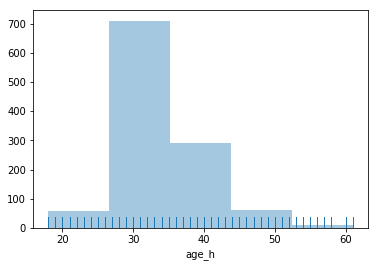

In [19]:
%matplotlib inline
sns.distplot(data.age_h, bins=5, kde=False, rug=True)

### Variables catégorielles

In [20]:
def barplot_percentage(varName, data, title,ax=None):
    total = float(len(data))
    ax = sns.countplot(x=varName, data=data,ax = ax ) # for Seaborn version 0.7 and more
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 20,
                '{:1.2f} %'.format(height/total*100),
                ha="center") 
    ax.set_title(title)
    ax.set(ylim=(0, 800))


In [21]:
len(data[data.tranche_bmi_h.isnull() == False ])


1108

In [22]:
categorical_data.head()

,diplome_h,patho_h,cryptorchidie,spermo,diplome_f,bh_f,ct_f,patho_f,fecondite,traitement,tranche_age_h,tranche_age_f,tranche_bmi_h,tranche_duree_infertilite
0,Bac+,non,Non,normal,Bac+,normal,ovulation,non,primaire,IAC,30 à 40 ans,30 à 40 ans,Surpoid,+ 2ans
1,Bac-,non,Non,anormal,Bac,normal,ovulation,NaN,primaire,ICSI,40 à 50 ans,- 30 ans,Corpulence normale,1-2 ans
2,Bac+,non,Non,anormal,Bac+,NaN,NaN,NaN,secondaire,IAC,40 à 50 ans,- 30 ans,Surpoid,6-12 mois
3,Bac+,non,Non,anormal,Bac+,normal,ovulation,pb tubaire unilateral,secondaire,FIV,30 à 40 ans,30 à 40 ans,Corpulence normale,+ 2ans
4,Bac,non,Non,azoo,Bac+,NaN,NaN,NaN,secondaire,Medical,30 à 40 ans,- 30 ans,Corpulence normale,- 6 mois


#### Données socio-démographique


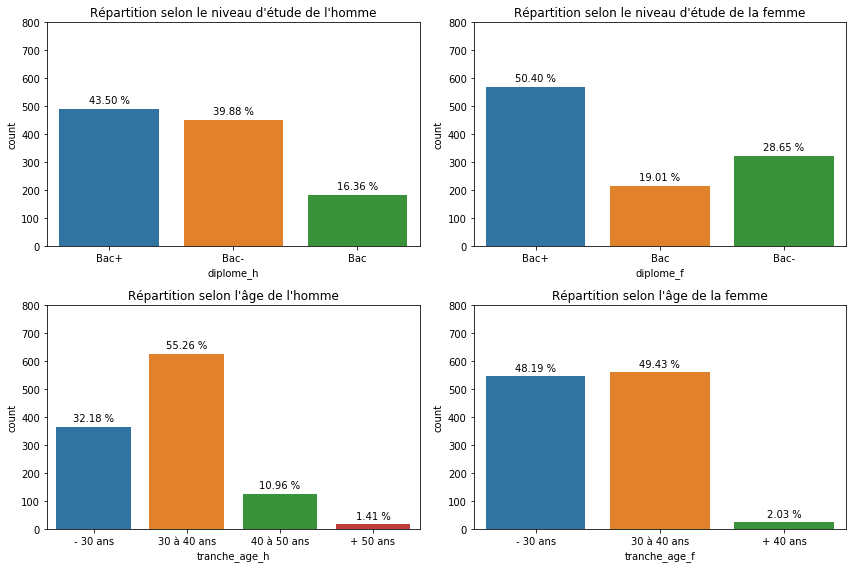

In [23]:
fig, axs = plt.subplots(ncols=2,nrows = 2, figsize=(12,8))

barplot_percentage('diplome_h', data, 'Répartition selon le niveau d\'étude de l\'homme', ax = axs[0,0])
barplot_percentage('diplome_f', data, 'Répartition selon le niveau d\'étude de la femme', ax = axs[0,1])
barplot_percentage('tranche_age_h', data, 'Répartition selon l\'âge de l\'homme', ax = axs[1,0])
barplot_percentage('tranche_age_f', data, 'Répartition selon l\'âge de la femme', ax = axs[1,1])
fig.tight_layout()

#### Etat de santé 

Plusieurs variables indiquent l'état de santé des couples:
- Indice de masse corporel
- Pathologie/problèmes de santé chez l'homme et la femme
- Cryptorchidie chez l'homme
- Spectrogramme chez l'homme
- Bilan hormonal de la femme
- Ovulation de la femme

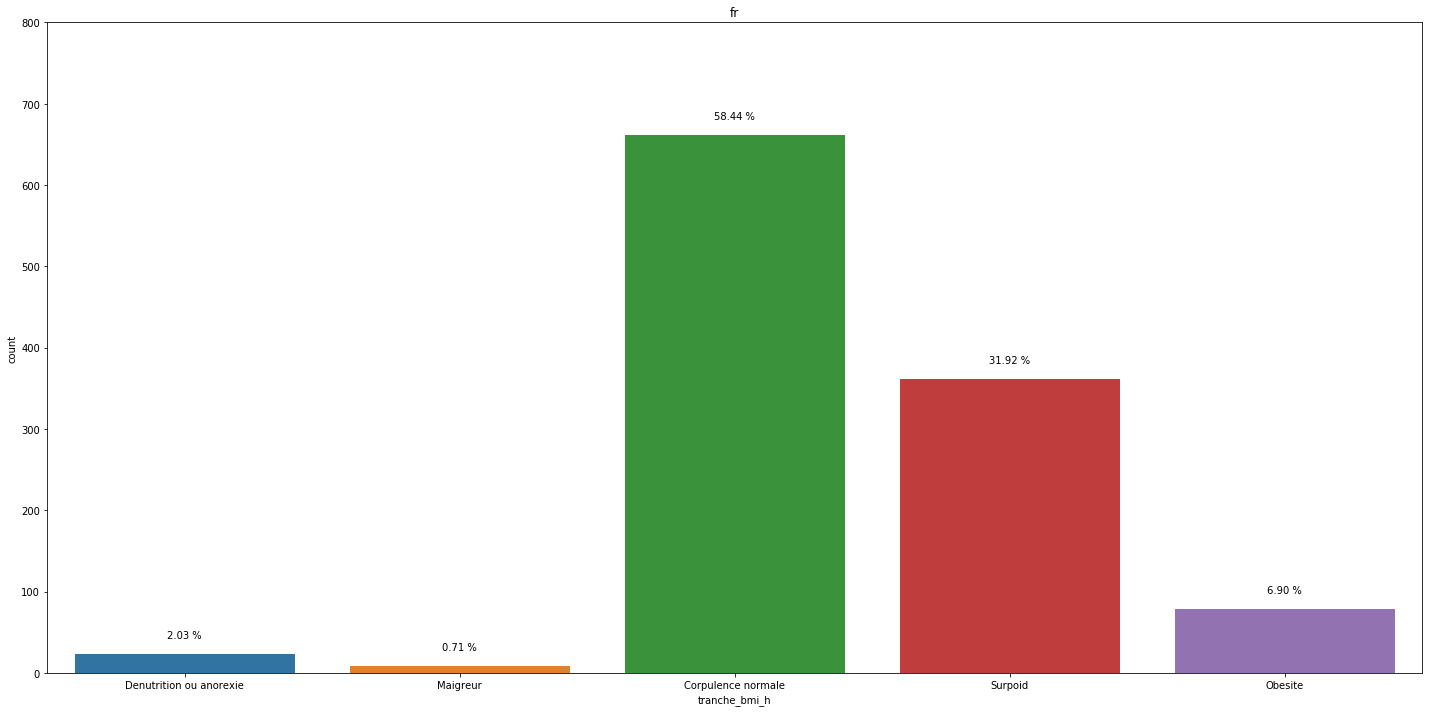

In [290]:
data.tranche_bmi_h = data.tranche_bmi_h.fillna('Denutrition ou anorexie')
plt.figure(figsize=(20,10))
barplot_percentage('tranche_bmi_h', data, 'fr')
plt.tight_layout()




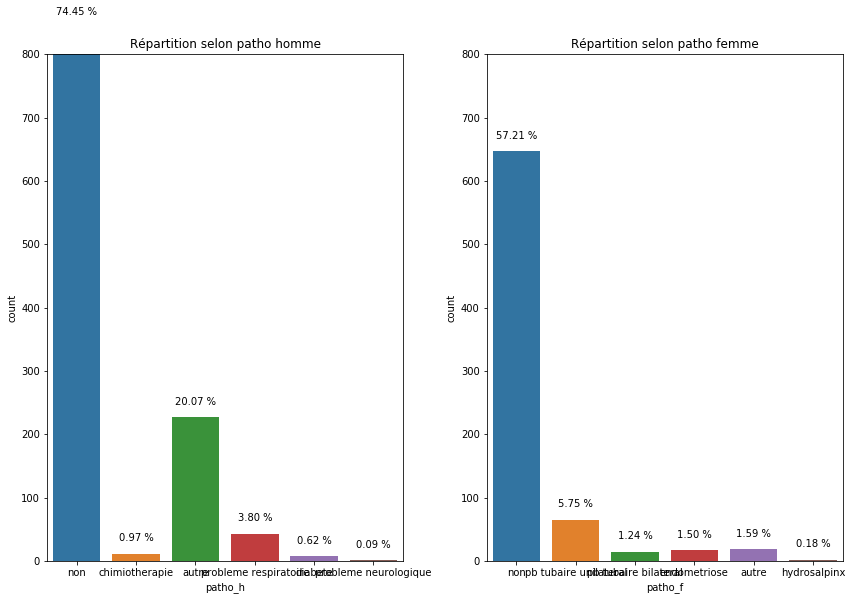

In [300]:
fig, axs = plt.subplots(ncols=2, figsize=(12,8))
barplot_percentage('patho_h', data, 'Répartition selon patho homme', ax = axs[0])
barplot_percentage('patho_f', data, 'Répartition selon patho femme', ax = axs[1])
fig.tight_layout()

In [299]:
list(set(data.patho_h))


In [198]:
list(set(data.patho_f))

['non',
 nan,
 'autre',
 'endometriose',
 'hydrosalpinx',
 'pb tubaire unilateral',
 'pb tubaire bilateral']

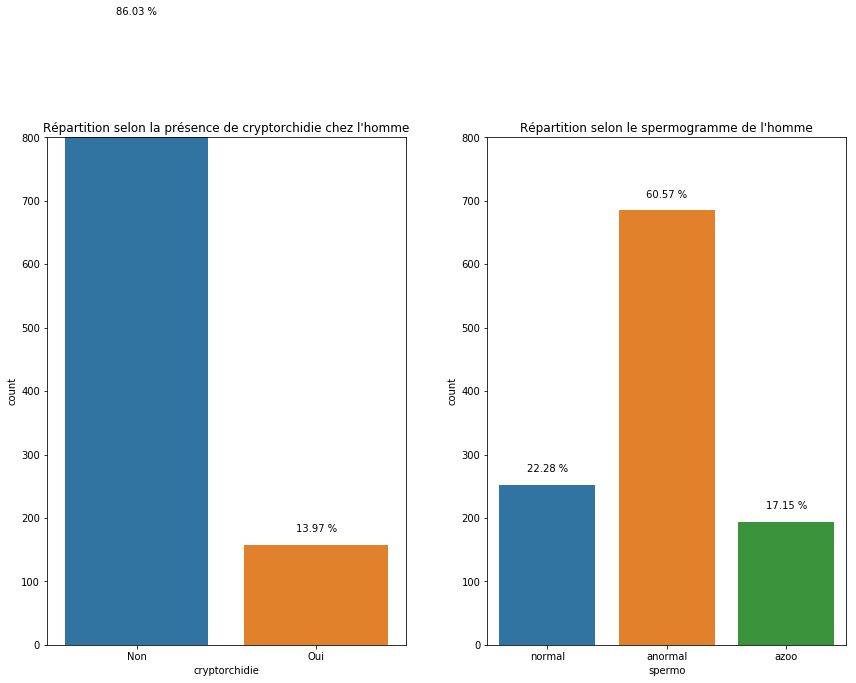

In [295]:
fig, axs = plt.subplots(ncols=2, figsize=(12,8))
barplot_percentage('cryptorchidie', data, 'Répartition selon la présence de cryptorchidie chez l\'homme', ax = axs[0])
barplot_percentage('spermo', data, 'Répartition selon le spermogramme de l\'homme', ax = axs[1])
fig.tight_layout()

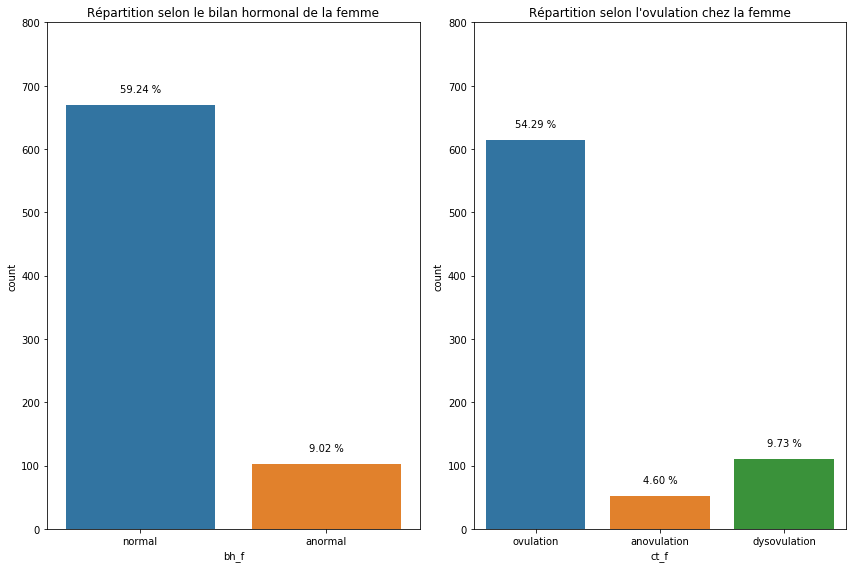

In [297]:
fig, axs = plt.subplots(ncols=2, figsize=(12,8))
barplot_percentage('bh_f', data, 'Répartition selon le bilan hormonal de la femme', ax = axs[0])
barplot_percentage('ct_f', data, 'Répartition selon l\'ovulation chez la femme', ax = axs[1])
fig.tight_layout()

In [1]:
#On a pas pris en compte les nan
fig, axs = plt.subplots(ncols=2, figsize=(12,8))
barplot_percentage('pb_H', data, 'Problème chez l\'homme', ax = axs[0])
barplot_percentage('pb_F', data, 'Problème chez la femme', ax = axs[1])
fig.tight_layout()

NameError: name 'plt' is not defined